# Tarea 2 Aprendizaje Automático
### Jose Morales Rendón, Matricula: 1501126

In [33]:
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import shapiro
import statistics
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [3]:
# leemos el archivo
df = pd.read_csv("BankChurners.csv")

In [5]:
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105


In [6]:
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [8]:
stat, p = shapiro(df["Customer_Age"])  # prueba Shapiro-Wilk
print("Shapiro p-value:", p)

Shapiro p-value: 4.4225224222952985e-16


C:\Users\JosedeJesusMoralesRe\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [14]:
stat, p = shapiro(df["Avg_Utilization_Ratio"])
print("Estadístico W:", stat, "p-value:", p)

Estadístico W: 0.8687143286854768 p-value: 4.962004392405331e-68


In [12]:
# pasamos a evaluar cada variable numerica mediante la prueba Shapiro. Wilk

col_numericas = df.select_dtypes(include=['float64', 'int64']).columns

results = {}

for col in col_numericas:
    stat, p = shapiro(df[col])
    results[col] = p

for col, p in results.items():
    print(f"{col}: p-value = {p:.5f} --> {'Normal' if p >= 0.05 else 'No normal'}")


CLIENTNUM: p-value = 0.00000 --> No normal
Customer_Age: p-value = 0.00000 --> No normal
Dependent_count: p-value = 0.00000 --> No normal
Months_on_book: p-value = 0.00000 --> No normal
Total_Relationship_Count: p-value = 0.00000 --> No normal
Months_Inactive_12_mon: p-value = 0.00000 --> No normal
Contacts_Count_12_mon: p-value = 0.00000 --> No normal
Credit_Limit: p-value = 0.00000 --> No normal
Total_Revolving_Bal: p-value = 0.00000 --> No normal
Avg_Open_To_Buy: p-value = 0.00000 --> No normal
Total_Trans_Amt: p-value = 0.00000 --> No normal
Total_Trans_Ct: p-value = 0.00000 --> No normal
Avg_Utilization_Ratio: p-value = 0.00000 --> No normal


C:\Users\JosedeJesusMoralesRe\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
riskAge = df.Customer_Age.dropna()

In [18]:
statistics.mean(riskAge)

46.32596030413745

<Axes: >

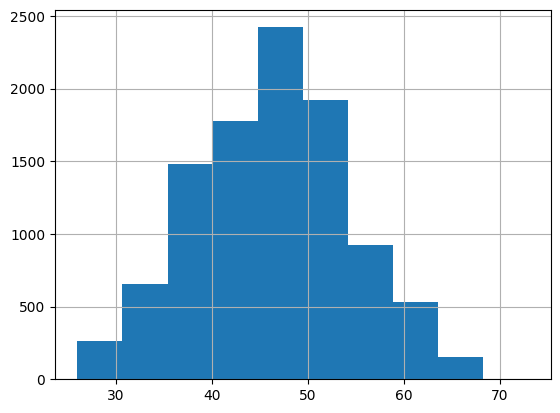

In [19]:
riskAge.hist()

In [20]:
risk_tobuy = df.Avg_Open_To_Buy.dropna()

<Axes: >

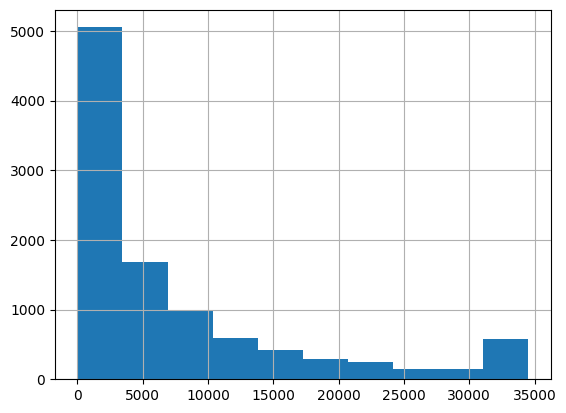

In [21]:
risk_tobuy.hist()

In [25]:
corr = df_numericas.corr(method="pearson")

In [24]:
df_numericas = df.select_dtypes(include=['float64', 'int64'])

In [37]:
pairs = []
for i, j in combinations(range(len(corr.columns)), 2):
    pairs.append((corr.columns[i], corr.columns[j], corr.iat[i, j]))

top_pairs = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)[:10]
top_corr_df = pd.DataFrame(top_pairs, columns=["Variable 1", "Variable 2", "Correlación"]).round(3)

print("\nTop 10 correlaciones más fuertes (en valor absoluto):")
print(top_corr_df)


Top 10 correlaciones más fuertes (en valor absoluto):
                 Variable 1             Variable 2  Correlación
0              Credit_Limit        Avg_Open_To_Buy        0.996
1           Total_Trans_Amt         Total_Trans_Ct        0.807
2              Customer_Age         Months_on_book        0.789
3       Total_Revolving_Bal  Avg_Utilization_Ratio        0.624
4           Avg_Open_To_Buy  Avg_Utilization_Ratio       -0.539
5              Credit_Limit  Avg_Utilization_Ratio       -0.483
6  Total_Relationship_Count        Total_Trans_Amt       -0.347
7  Total_Relationship_Count         Total_Trans_Ct       -0.242
8              Credit_Limit        Total_Trans_Amt        0.172
9           Avg_Open_To_Buy        Total_Trans_Amt        0.166


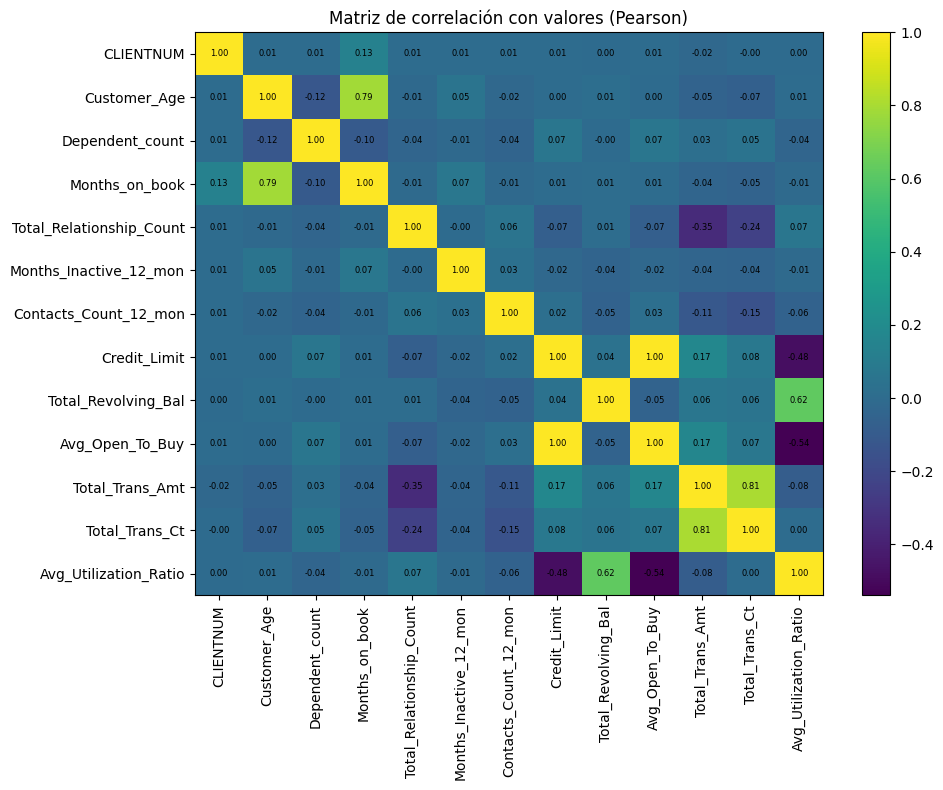

In [29]:
# Calcular matriz de correlación
corr = df_numericas.corr()

# Graficar heatmap con valores visibles
plt.figure(figsize=(10, 8))
im = plt.imshow(corr, aspect='auto', cmap='viridis')
plt.colorbar(im)

# Etiquetas de ejes
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)

# 🔥 Aquí va la magia: imprimir valores numéricos sobre cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iat[i, j]:.2f}", ha='center', va='center', color='black', fontsize=6)

plt.title("Matriz de correlación con valores (Pearson)")
plt.tight_layout()
plt.show()


#### Se identificó una correlación fuerte entre Monto total de transacciones 12m y Número total de transacciones 12 m (r ≈ 0.81), indicando que un ayor número de transacciones se asocia con mayores montos totales
#### También se encontraron correlaciones negativas moderadas entre Limite de crédito y % de uso del crédito (r ≈ -0.48), lo que sugiere que los clientes con límites de crédito más altos tienden a utilizar un menor porcentaje del mismo.

##### Prueba de hipotesis
#### H0: No existe relación lineal entre número de transacciones y monto total.
#### H1: Sí existe relación lineal entre número de transacciones y monto total.

In [32]:
# como los datos son NO PARAMETRICOS utilizamos una SPEARMAN

# Extraer variables
x = df["Total_Trans_Ct"]
y = df["Total_Trans_Amt"]

# Prueba Spearman
rho, p = spearmanr(x, y)

print("Estadistico spearman:", rho)
print("p-value:", p)

Coeficiente de Spearman: 0.8797254119455286
p-value: 0.0


#### Rechazamos H0 por lo que inferimos que Si hay relación lineal entre el número de transacciones y el monto total

<Figure size 800x600 with 0 Axes>

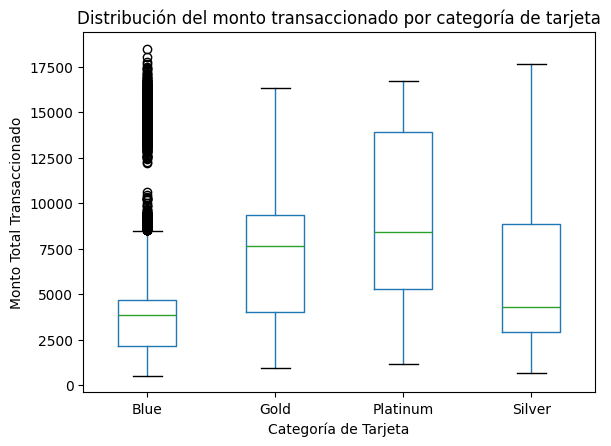

In [36]:
# Grafico de bigotes del gasto por categoría de tarjeta
plt.figure(figsize=(8, 6))
df.boxplot(column="Total_Trans_Amt", by="Card_Category", grid=False)
plt.title("Distribución del monto transaccionado por categoría de tarjeta")
plt.suptitle("")  # Quita el título automático "Boxplot grouped by"
plt.xlabel("Categoría de Tarjeta")
plt.ylabel("Monto Total Transaccionado")
plt.show()
